# MNIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [2]:
def get_concat(foldername, seeds):
    for i, seed in enumerate(seeds):
        if i == 0: data = pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))
        else: 
            try: 
                data = pd.concat([data, pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))])
            except:
                pass
    # print(foldername, len(data))
    return data

def get_concat_glob(paths):
    data_ = list()
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"] + data["gn"].astype(str)
        if "LR" in path:
            data["LR"] = float(path.split("LR")[1][:3])
        else:
            data["LR"] = 0.1

        if "G11" in path:
            data["Mode"] = "G11"
            if "Lin" in path:
                data["Decay"] = "GN_Lin"
            else:
                data["Decay"] = "GN_No"
        else:
            data["Decay"] = "No"
        if "G00" in path or "G11" in path:
             pass
        else:
            continue
        if len(data_) == 0: 
            data_ = data
        else: 
            data_ = pd.concat([data_, data])
    return data_

# Digits

In [3]:
import seaborn as sns
import copy

def get_data():
    datas = list()
    save_path = "../Output/CIFAR10noBN2-*/s[1-9].csv"
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    data_temp['Mode'] = data_temp['Mode'] .map({'fedavg0': "FedAvg", 
                                                'fedprox0': "FedProx", 
                                                'scaffold0': "Scaffold",  
                                                'feddyn0': "FedDyn", 
                                                'G11': "FedGN",
                                                # 'G11': "FedGN+mean",
                                            })
    print(data_temp["Mode"].unique())
    sk = ["Balanced IID partition", "Balanced Dirichlet partition (α=0.3)"]
    data_temp = data_temp.set_index('Distribution').loc[sk].reset_index()
    sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn', "FedGN"]
    data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    print(data_temp.shape)

    return data_temp

['Scaffold' 'FedGN' 'FedAvg' 'FedProx' 'FedDyn']
(8451, 22)
(42, 22)
(38, 22)
(40, 22)


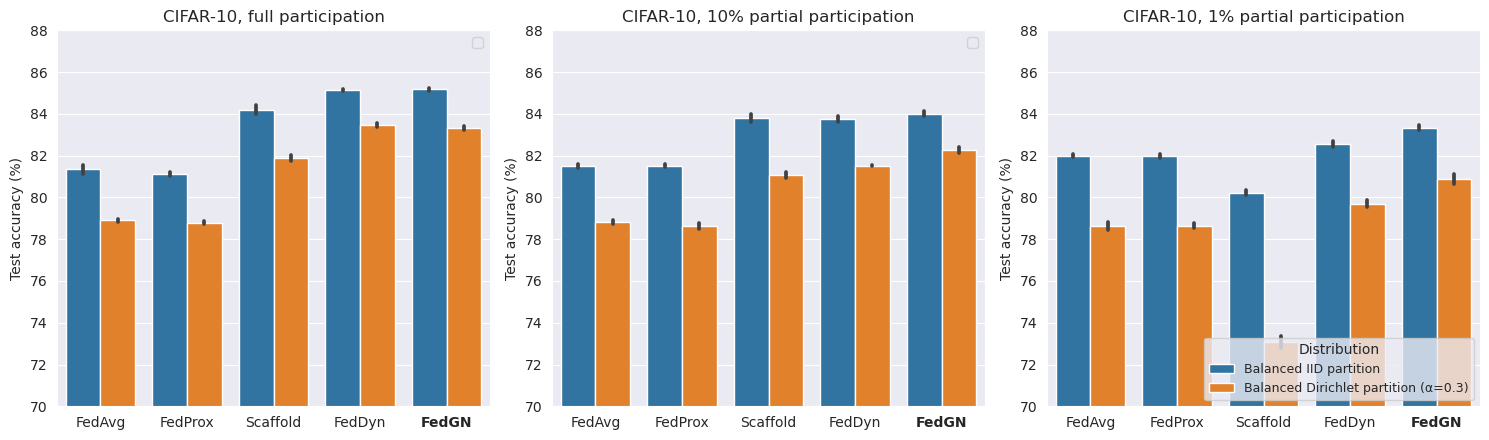

In [6]:
data_temp = get_data()

fig, axes = plt.subplots(1, 3, figsize=(15,4.5), dpi=100, sharey=False)

sns.set_style("darkgrid")
for i, ap, lr, epoch in zip(range(3), [1., 0.1, 0.01], [3.0, 1.2, 1.2], [499, 499, 999]):
    ax = axes[i]
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == epoch]
    temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == lr)]
    temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
    print(temp.shape)
    try:
        ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, hue="Distribution", errorbar="se")
    except:
        pass

for ax in axes.flatten():
    ax.set_xlabel("")
    ax.set_ylabel("Test accuracy (%)"), 
    ax.get_xticklabels()[-1].set_fontweight('bold')
    ax.set_ylim([70, 88])

# axes[0].legend(title="Distribution", loc=4, prop={'size': 9}), 
axes[0].legend('')
axes[1].legend('')
axes[2].legend(title="Distribution", loc=4, prop={'size': 9}), 
axes[0].set_title("CIFAR-10, full participation")
axes[1].set_title("CIFAR-10, 10% partial participation")
axes[2].set_title("CIFAR-10, 1% partial participation")

fig.tight_layout()

['Scaffold' 'FedGN' 'FedAvg' 'FedProx' 'FedDyn']
(8451, 22)
(2100, 22)
(1901, 22)
(4000, 22)


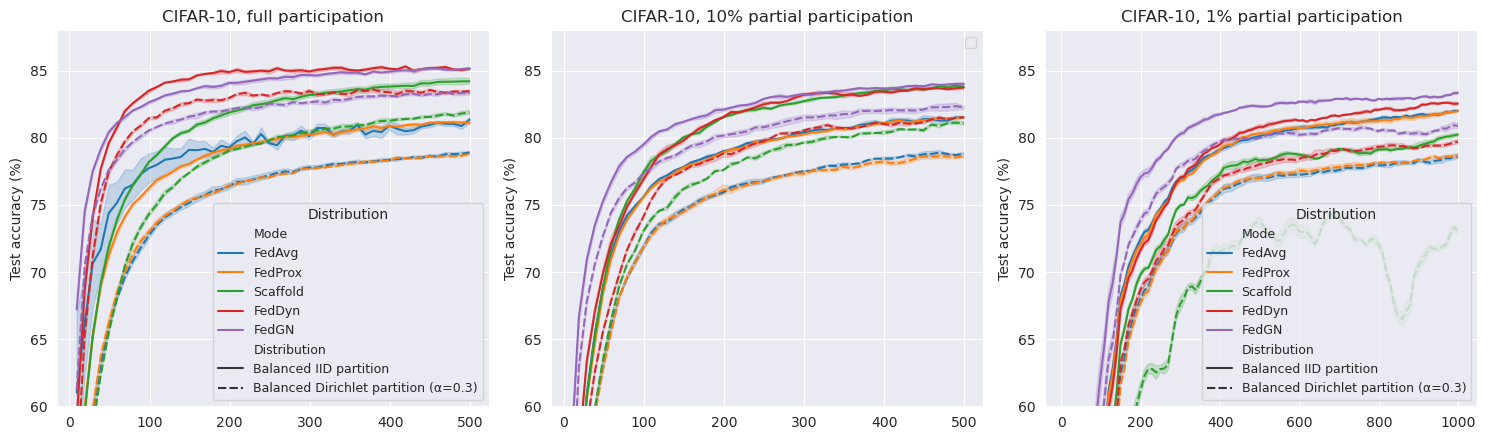

In [5]:
data_temp = get_data()

fig, axes = plt.subplots(1, 3, figsize=(15,4.5), dpi=100, sharey=False)

sns.set_style("darkgrid")
for i, ap, lr in zip(range(3), [1., 0.1, 0.01], [3.0, 1.2, 1.2]):
    ax = axes[i]
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    # temp = temp[temp["epoch"] <= 499]
    temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == lr)]
    temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
    print(temp.shape)
    try:
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")
    except:
        pass
for ax in axes.flatten():
    ax.set_xlabel("")
    ax.set_ylabel("Test accuracy (%)"), 
    ax.get_xticklabels()[-1].set_fontweight('bold')
    ax.set_ylim([60, 88])

axes[0].legend(title="Distribution", loc=4, prop={'size': 9}), 
axes[1].legend('')
axes[2].legend(title="Distribution", loc=4, prop={'size': 9}), 
axes[0].set_title("CIFAR-10, full participation")
axes[1].set_title("CIFAR-10, 10% partial participation")
axes[2].set_title("CIFAR-10, 1% partial participation")

fig.tight_layout()